In [1]:
#visualize end_to_end dataset as wavefield

In [1]:
from models.model_utils import fetch_data_end_to_end
from generate_data import wave_util
import matplotlib.pyplot as plt
import torch

f_delta_x = .2
dx = 2.0/128.0

#get data
path = "../data/end_to_end_bp_m_200_128.npz"
loaders = fetch_data_end_to_end([path], shuffle=False, batch_size=1)

setting up data
test data points: 180 | train data points: 20


0 ------------------------------------------------------------------------------------------------------------------------------------------------------


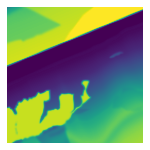

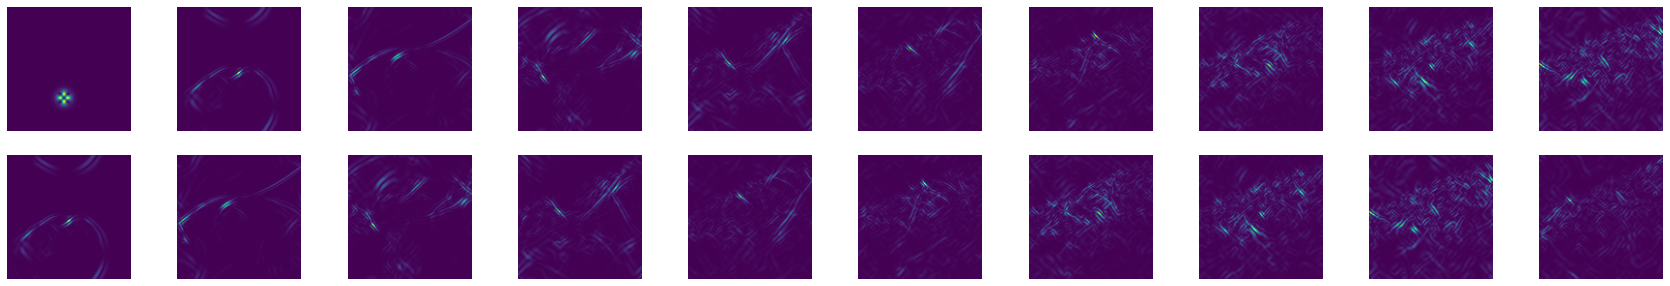

1 ------------------------------------------------------------------------------------------------------------------------------------------------------


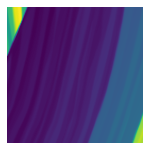

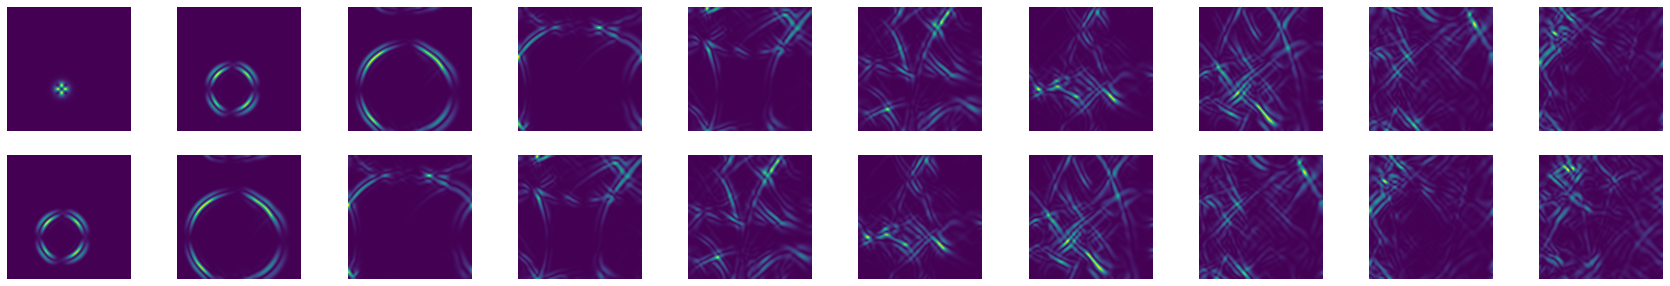

2 ------------------------------------------------------------------------------------------------------------------------------------------------------


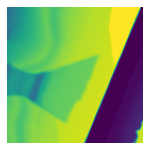

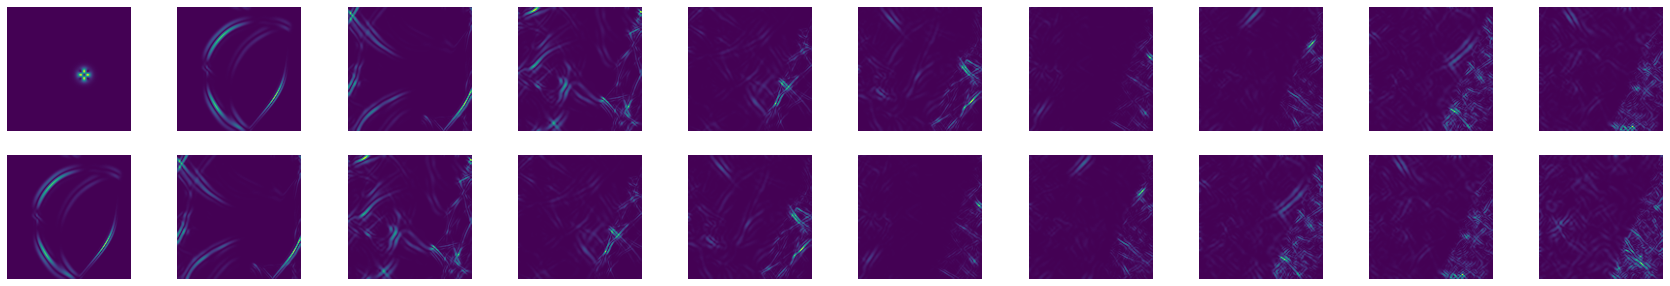

3 ------------------------------------------------------------------------------------------------------------------------------------------------------


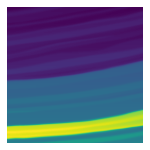

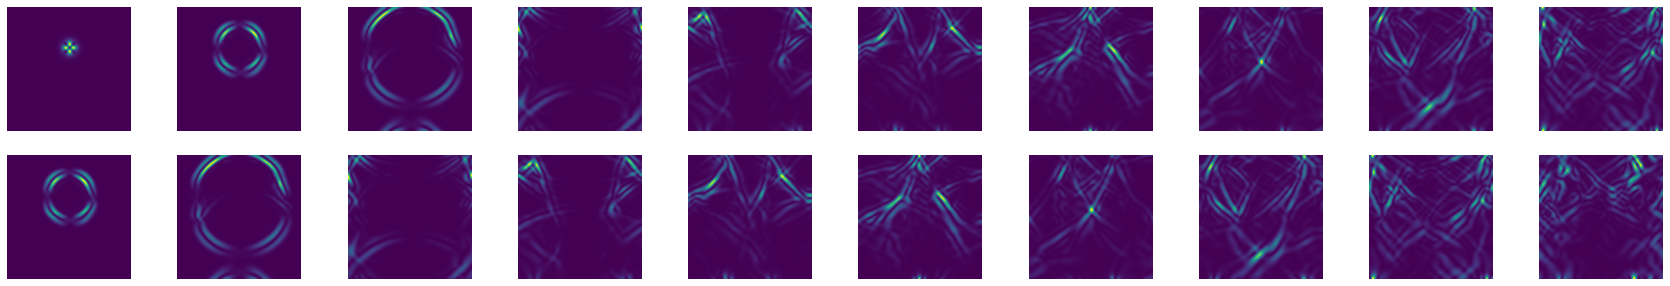

4 ------------------------------------------------------------------------------------------------------------------------------------------------------


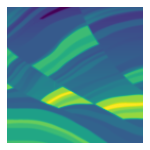

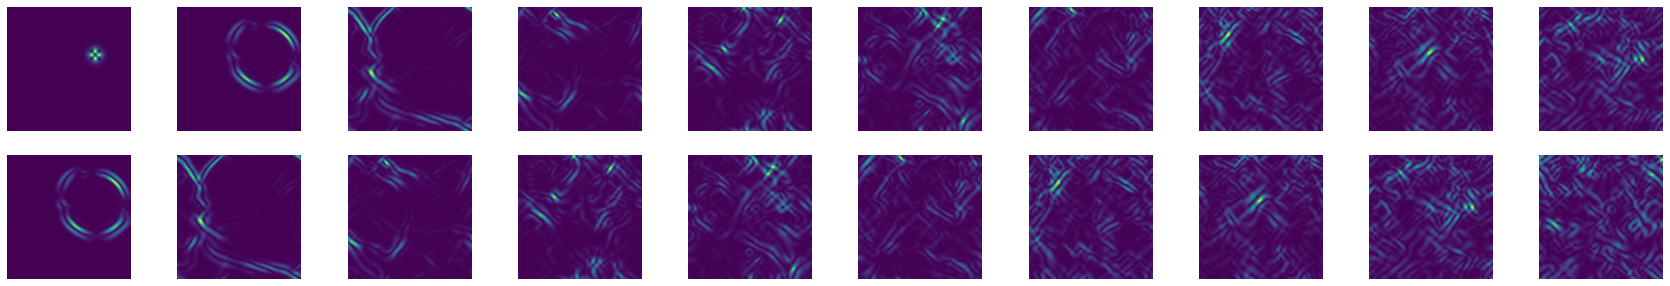

5 ------------------------------------------------------------------------------------------------------------------------------------------------------


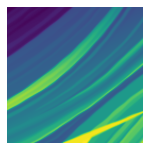

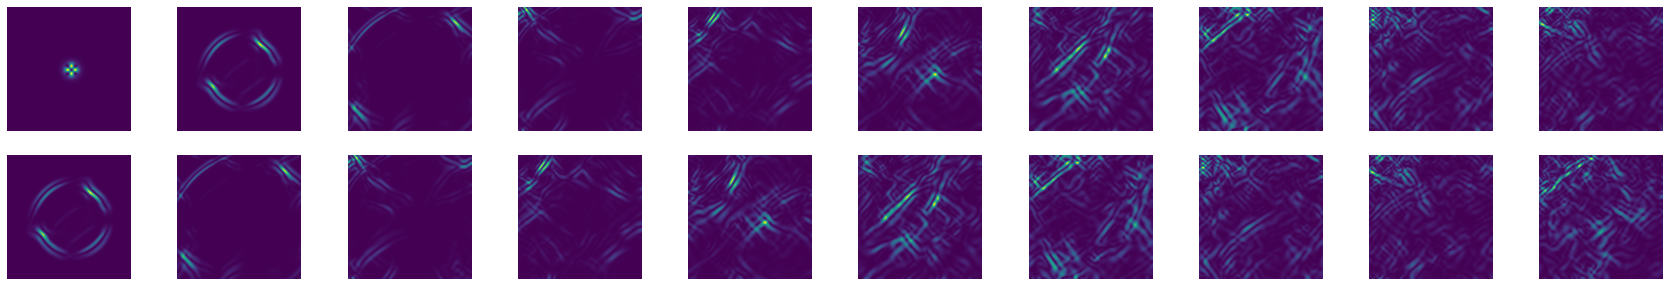

6 ------------------------------------------------------------------------------------------------------------------------------------------------------


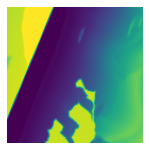

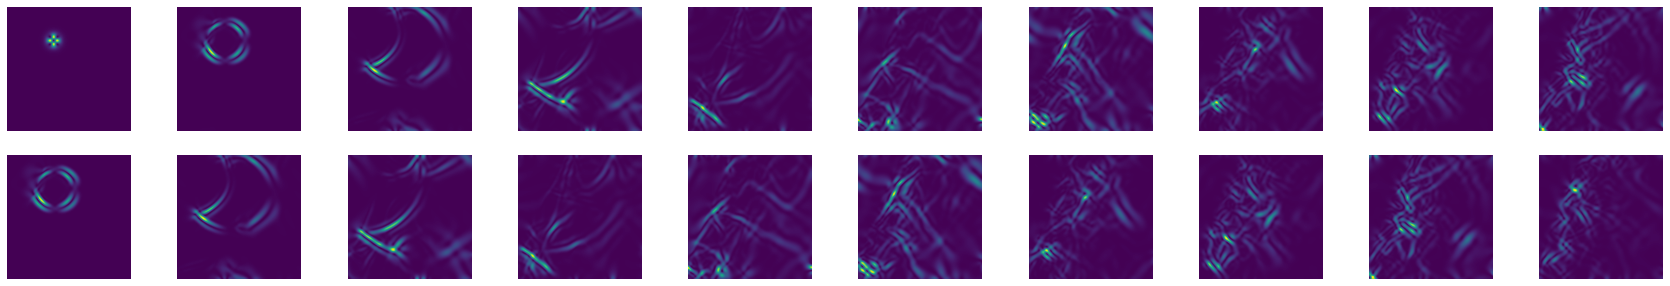

7 ------------------------------------------------------------------------------------------------------------------------------------------------------


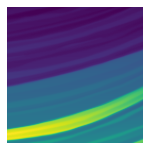

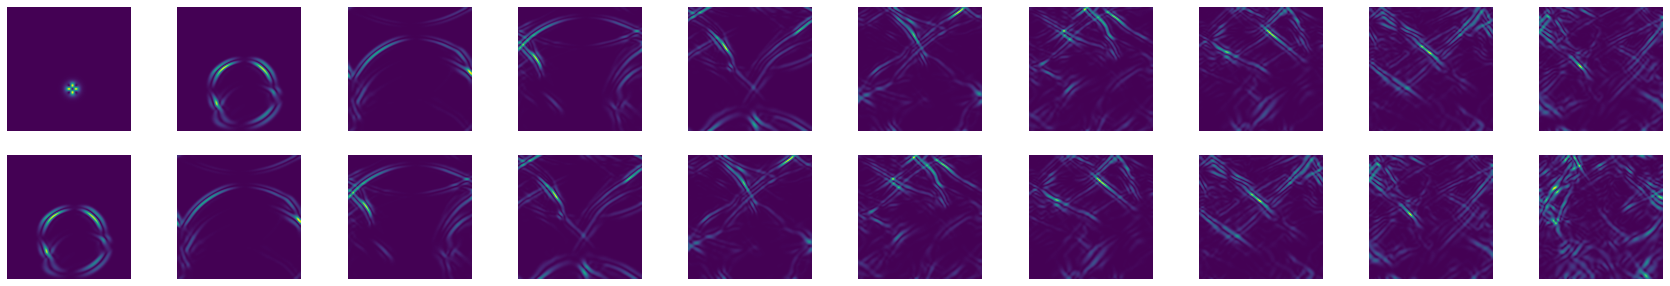

8 ------------------------------------------------------------------------------------------------------------------------------------------------------


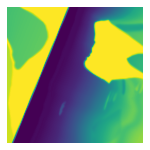

KeyboardInterrupt: 

In [41]:
for loader in loaders:
    for i, data in enumerate(loader):
        print(i, "-"*150)

        input = data[0]

        plt.figure(figsize = (2.5,2.5))
        plt.imshow(input[0, 0, 3, :, :])
        plt.axis('off')
        plt.show()

        fig = plt.figure(figsize=(30,5))

        for idx in range(10):

            #input vis
            u_x, u_y, u_t_c, vel = input[:,idx, 0, :, :], input[:,idx, 1, :, :], input[:,idx, 2, :, :], input[:,idx, 3, :, :]
            sumv = torch.sum(torch.sum(u_x))
            u, ut = wave_util.WaveSol_from_EnergyComponent_tensor(u_x, u_y, u_t_c, vel, f_delta_x, sumv)

            ax1 = fig.add_subplot(2,10,idx+1)
            pos1 = ax1.imshow(wave_util.WaveEnergyField_tensor(u[0,:,:],ut[0,:,:],vel[0,:,:],dx)*dx*dx)
            plt.axis('off')

            #label vis
            u_x, u_y, u_t_c, vel = input[:,idx+1, 0, :, :], input[:,idx+1, 1, :, :], input[:,idx+1, 2, :, :], input[:,idx+1, 3, :, :]
            sumv = torch.sum(torch.sum(u_x))
            u, ut = wave_util.WaveSol_from_EnergyComponent_tensor(u_x, u_y, u_t_c, vel, f_delta_x, sumv)

            ax2 = fig.add_subplot(2,10,idx+11)
            pos2 = ax2.imshow(wave_util.WaveEnergyField_tensor(u[0,:,:],ut[0,:,:],vel[0,:,:],dx))
            plt.axis('off')


        plt.show()